## Programming for Data Analysis Project
#### Hayley Doherty G00387849
---

My sister is a Spanish teacher in the local secondary school and so for this project I decided to ask her what factors were most influential in the grade a student go tin their mock LC exmas and simulated these factors to determine if there was any correlations between them and the grades received. The 3 factors I chose are the number of absences from class during the semester, the sex of the student and the number of hours per week the student studies outside of school. 

looking at hiigher level grades over past 3 years since her first year of teaching.
LC higher level marked from H1-H8.
grades are awarded according to a bell-shaped curve and so are normally distributed [1]. as the data for this vairable can only be between 1-8 it is called a discrete variable.
the number of absences from class is a count variable. it takes only non-negative integer values. when a count variable is treated as a random variable such as this, the poisson distribution can be used to represent its distribution.
the sex of the student is a categorical variable. this is a variable that has 2 or more categories with no intrinsicordering bwtween them [2].

similar to the number of absences, the number of hours per week a student studies outside of school is a count variable and ccan only take a non-negative integer value [3].

In [84]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
rng = default_rng()
import pandas as pd

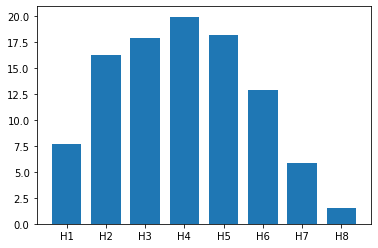

In [5]:
labels = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8']
means = [7.7, 16.2, 17.9, 19.9, 18.1, 12.9, 5.8, 1.5]
x = np.arange(len(labels))
width = 0.75

ax = plt.subplot()
rects = ax.bar(x, means, width)
ax.set_xticks(x)
ax.set_xticklabels(labels)

plt.show()


In [71]:
from scipy.stats import truncnorm

def get_truncated_normal(mean=0, sd=1, low=0, upp=10):
    return truncnorm(
        (low - mean) / sd, (upp - mean) / sd, loc=mean, scale=sd)

[4]

In [72]:
x = get_truncated_normal(4, 1.5, 1, 8)
results = x.rvs(105)

In [98]:
results = np.round(results, 0)
results= results.astype(int) 
results = sorted(results, reverse=True)
results = np.array(results)
results= results.astype(int) 

In [109]:
results = np.array(results)

In [78]:
def CountFrequency(mylist):
    freq = {} 
    for item in mylist: 
        if (item in freq): 
            freq[item] += 1
        else: 
            freq[item] = 1
    return freq
resultsfreq = CountFrequency(results)
resultsfreq

{8: 1, 7: 6, 6: 11, 5: 29, 4: 33, 3: 10, 2: 13, 1: 2}

In [79]:
results1 = list(resultsfreq.values())
results1

[1, 6, 11, 29, 33, 10, 13, 2]

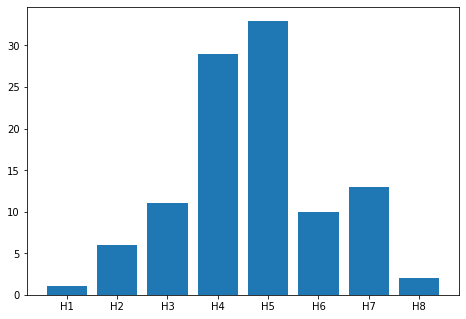

In [80]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
grades = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8']
results
ax.bar(grades, results1)
plt.show()

In [81]:
results1

[1, 6, 11, 29, 33, 10, 13, 2]

In [82]:
percentages = []
for x in results1:
    x = x/105*100
    percentages.append(x)
percentages

[0.9523809523809524,
 5.714285714285714,
 10.476190476190476,
 27.61904761904762,
 31.428571428571427,
 9.523809523809524,
 12.380952380952381,
 1.9047619047619049]

The distribution of sex in secondary schools in ireland is roughly equal with 27698 boys and 28373 girls sitting their leaving cert exams in 2019 [5].

In [101]:
sex = rng.integers(1, size = 105, endpoint = True)
sex= sex.astype(int)
sex

array([0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1])

In [108]:
sex = np.array(sex)

number of absences and number of hours studied per week are count variables and follow the Poisson distribution. The poisson distribution is the discrete probability distribution of an event happening in a given time period. 

105 students x 167 teaching days = 17535 days
7.9% = 1385
13.193

In [123]:
absent = []
while len(absent) <= 104:
    x = rng.normal(13, 8)
    if x >= 0:
        absent.append(x)
absent= np.array(absent)
absent= absent.astype(int)
absent.sort()
absent

array([ 0,  0,  0,  1,  2,  2,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,
        5,  5,  5,  5,  5,  6,  6,  7,  7,  7,  7,  8,  8,  8,  8,  8,  8,
        9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11,
       11, 11, 11, 12, 12, 12, 12, 12, 12, 13, 13, 14, 14, 14, 14, 14, 14,
       14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 18, 18, 18, 18, 18, 18, 18,
       19, 19, 19, 20, 20, 20, 21, 21, 21, 21, 22, 22, 23, 24, 25, 25, 26,
       26, 29, 30])

In [124]:
np.random.shuffle(absent)
absent= absent.astype(int)

In [125]:
absent = np.array(absent)

In [126]:
np.mean(absent)

12.104761904761904

In [127]:
len(absent)

105

In [117]:
hours = []
while len(hours) <= 104:
    x = rng.normal(5, 1.5)
    if x >= 0:
        hours.append(x)
hours= np.array(hours)
hours= hours.astype(int)
hours.sort()
hours= np.array(hours)
hours

array([1, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 8, 9, 9])

In [118]:
len(hours)

105

In [144]:
student = list(range(1, 106))
student
student = rng.permutation(student)
print(student)

[ 56  54  52  86  63  72  79  22  28  37  50  24  11  82  93  96  35  81
  15  36  75  98  20 105  30  58  67  55  92  62   2  69  90  65  48  83
   1  70  57  16  40  44  71 104  39  33  46  97  84  14  42  13  88  18
  49  25   4  85  91  17  47  34  61  68   5  89  38  64 100  43   9  29
  80  32  31  27  77  26  94  78   6 103  99  12  76  23  74  45  10  95
  19   7   3  66  60 102 101  51  59  53  21  41  87  73   8]


In [147]:
my_array = np.stack((student, results, sex, absent, hours), axis=1)
my_array

array([[ 56,   8,   0,  20,   1],
       [ 54,   7,   1,  15,   2],
       [ 52,   7,   1,  19,   2],
       [ 86,   7,   1,   3,   3],
       [ 63,   7,   1,  18,   3],
       [ 72,   7,   0,  11,   3],
       [ 79,   7,   0,   9,   3],
       [ 22,   6,   1,  25,   3],
       [ 28,   6,   0,  16,   3],
       [ 37,   6,   0,  15,   3],
       [ 50,   6,   0,  19,   3],
       [ 24,   6,   1,   9,   3],
       [ 11,   6,   1,  26,   3],
       [ 82,   6,   0,  16,   3],
       [ 93,   6,   0,   5,   3],
       [ 96,   6,   0,  10,   3],
       [ 35,   6,   1,   8,   3],
       [ 81,   6,   1,  11,   3],
       [ 15,   5,   1,  10,   3],
       [ 36,   5,   0,  15,   3],
       [ 75,   5,   0,  15,   3],
       [ 98,   5,   1,   5,   3],
       [ 20,   5,   0,   3,   3],
       [105,   5,   1,  12,   3],
       [ 30,   5,   1,  21,   3],
       [ 58,   5,   1,   1,   3],
       [ 67,   5,   1,   8,   3],
       [ 55,   5,   1,  11,   4],
       [ 92,   5,   0,   5,   4],
       [ 62,  

In [148]:
df = pd.DataFrame(my_array, columns = ['Student', 'Results', 'Sex', 'Absent', 'Hours'])
df

,Student,Results,Sex,Absent,Hours
0,56,8,0,20,1
1,54,7,1,15,2
2,52,7,1,19,2
3,86,7,1,3,3
4,63,7,1,18,3
...,...,...,...,...,...
100,21,2,0,15,7
101,41,2,1,21,7
102,87,2,1,29,8
103,73,1,0,3,9


In [166]:
df = df.sort_values(by=['Results', 'Sex', 'Absent', 'Hours'])
df

,Student,Results,Sex,Absent,Hours
103,73,1,0,3,9
104,8,1,1,11,9
90,19,2,0,3,6
93,66,2,0,14,6
100,21,2,0,15,7
...,...,...,...,...,...
3,86,7,1,3,3
1,54,7,1,15,2
4,63,7,1,18,3
2,52,7,1,19,2


In [168]:
df['Sex'].value_counts()

1    57
0    48
Name: Sex, dtype: int64

In [178]:
female = df[df['Sex']==1]
female

,Student,Results,Sex,Absent,Hours
104,8,1,1,11,9
92,3,2,1,0,6
91,7,2,1,3,6
96,101,2,1,7,7
98,59,2,1,10,7
97,51,2,1,12,7
95,102,2,1,18,6
99,53,2,1,19,7
101,41,2,1,21,7
94,60,2,1,23,6


In [188]:
female['Results'].value_counts(sort = False, ascending = True)

1     1
2    10
3     5
4    18
5    14
6     5
7     4
Name: Results, dtype: int64

In [189]:
male = df[df['Sex']==0]
male

,Student,Results,Sex,Absent,Hours
103,73,1,0,3,9
90,19,2,0,3,6
93,66,2,0,14,6
100,21,2,0,15,7
84,76,3,0,0,6
83,12,3,0,2,6
80,6,3,0,2,6
85,23,3,0,12,6
82,99,3,0,22,6
78,94,4,0,0,6


In [190]:
male['Results'].value_counts(sort = False, ascending = True)

1     1
2     3
3     5
4    15
5    15
6     6
7     2
8     1
Name: Results, dtype: int64

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
grades = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8']
results
ax.bar(grades, results1)
plt.show()

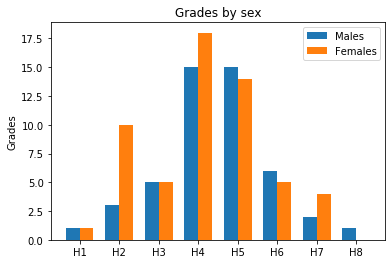

In [196]:
labels = ['H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8']
males = [1, 3, 5, 15, 15, 6, 2, 1]
females = [1, 10, 5, 18, 14, 5, 4, 0]

ind = np.arange(len(males))
width = 0.35

fig, ax = plt.subplots()

rects1 = ax.bar(ind-width/2, males, width, label='Males')
rects2 = ax.bar(ind+width/2, females, width, label='Females')

ax.set_ylabel('Grades')
ax.set_title('Grades by sex')
ax.set_xticks(ind)
ax.set_xticklabels(('H1', 'H2', 'H3', 'H4', 'H5', 'H6', 'H7', 'H8'))

ax.legend()

plt.show()

In [197]:
df.head(5)

,Student,Results,Sex,Absent,Hours
103,73,1,0,3,9
104,8,1,1,11,9
90,19,2,0,3,6
93,66,2,0,14,6
100,21,2,0,15,7


In [202]:
df['Hours'].value_counts()

4    26
5    25
3    24
6    18
7     6
9     2
2     2
8     1
1     1
Name: Hours, dtype: int64

In [218]:
df.groupby('Results').agg({"Hours": "mean"})

,Hours
Results,
1,9.000000
2,6.615385
3,6.000000
4,4.878788
5,3.689655
6,3.000000
7,2.666667
8,1.000000


In [219]:
df.groupby('Results').agg({"Absent": "mean"})

,Absent
Results,
1,7.000000
2,13.384615
3,9.800000
4,12.909091
5,10.482759
6,14.545455
7,12.500000
8,20.000000


[1] https://careersportal.ie/school/lc_subject_detail.php?course_name=Spanish&search1=spanish&search2=&course_id=31&lc_subject_group=4

[2] https://stats.idre.ucla.edu/other/mult-pkg/whatstat/what-is-the-difference-between-categorical-ordinal-and-numerical-variables/

[3]. https://en.wikipedia.org/wiki/Count_data#:~:text=5%20Further%20reading-,Count%20variables,used%20to%20represent%20its%20distribution.

[4]. https://docs.scipy.org/doc/scipy-0.17.0/reference/generated/scipy.stats.truncnorm.html

[5]. Women and Men in Ireland 2019, https://www.cso.ie/en/releasesandpublications/ep/p-wamii/womenandmeninireland2019/education/